# Group assignment 1.4 Distribution fitting

*[CEGM1000 MUDE](http://mude.citg.tudelft.nl/)*

*Written by: Patricia Mares Nasarre and Robert Lanzafame; updated by Max Ramgraber*

*Due: `<day of week>`, `<month>` `<day>`, `<year>`.*

## Case 1: Wave impacts on a crest wall

**What's the propagated uncertainty? *How large will the horizontal force be?***

In this project, you have chosen to work on the uncertainty of wave periods and wave heights in the Alboran sea to estimate the impacts on a crest wall: a concrete element installed on top of mound breakwater. You have observations from buoys of the significant wave height ($H$) and the peak wave period ($T$) each hour for several years. As you know, $H$ and $T$ are hydrodynamic variables relevant to estimate wave impacts on the structure. The maximum horizontal force (exceeded by 0.1% of incoming waves) can be estimated using the following equation (USACE, 2002):

$$
F_h = \left( A_1 + A_2 \frac{H}{A_c} \right) \rho g C_h L_{0p} \tag{1}
$$

where $A_1=-0.016$ and $A_2=0.025$ are coefficients that depend on the geometry of the structure, $A_c=3m$ is the elevation of the frontal berm of the structure, $\rho$ is the density of water, $g$ is the gravity acceleration, $C_h=2m$ is the crown wall height, and $L_{0p}=\frac{gT^2}{2\pi}$ is the wave length in deep waves. Substituting in these quantities, Equation 1 simplifies to

$$
F_h = 255.4 H T^2 -490.4 T^2 \tag{2}
$$

**The goal of this project is:**
1. Choose a reasonable distribution function for $H$ and $T$.
2. Fit the chosen distributions to the observations of $H$ and $T$.
3. Assuming $H$ and $T$ are independent, propagate their distributions to obtain the distribution of $F_h$.
4. Analyze the distribution of $F_h$.

## Importing packages

In [1]:
import numpy as np              # For math
import matplotlib.pyplot as plt # For plotting
from scipy import stats         # For math
from math import ceil, trunc    # For plotting

# This is just cosmetic - it updates the font size for our plots
plt.rcParams.update({'font.size': 14})

## 1. Explore the data

First step in the analysis is exploring the data, visually and through statistics. 

Tip: In the workshop files, you have used the pandas `.describe()` function to obtain the statistics of a data vector. `scipy.stats` has a similar function.

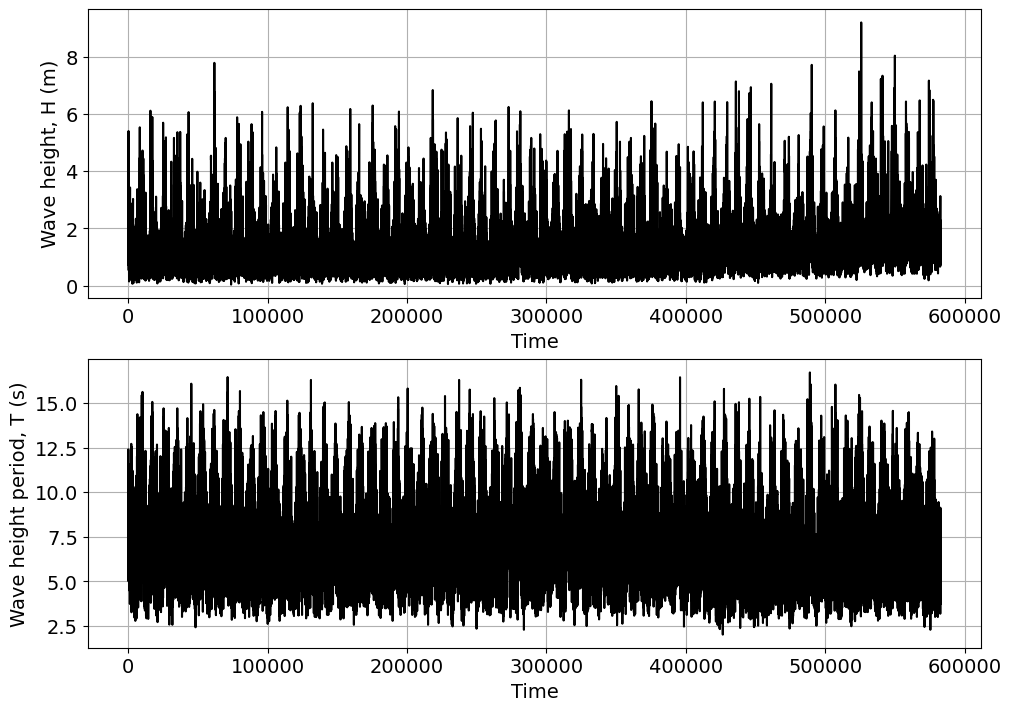

In [2]:
# Import the data from the .csv file
_, H, T = np.genfromtxt('dataset_HT.csv', delimiter=",", unpack=True, skip_header=True)

# Plot the time series for the wave height H
fig, ax = plt.subplots(2, 1, figsize=(10, 7), layout = 'constrained')
ax[0].plot(H,'k')
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Wave height, H (m)')
ax[0].grid()

# Plot the time series for the peak wave period T
ax[1].plot(T,'k')
ax[1].set_xlabel('Time')
ax[1].set_ylabel('Wave height period, T (s)')
ax[1].grid()

In [3]:
# Statistics for H
print(stats.describe(H))

DescribeResult(nobs=582755, minmax=(np.float64(0.04), np.float64(9.19)), mean=np.float64(1.296410395449203), variance=np.float64(0.6644958817096485), skewness=np.float64(1.7333548566943697), kurtosis=np.float64(4.692941566067729))


In [4]:
# Statistics for T
print(stats.describe(T))

DescribeResult(nobs=582755, minmax=(np.float64(2.02), np.float64(16.71)), mean=np.float64(6.861141165669963), variance=np.float64(4.710342223823444), skewness=np.float64(0.7832887838396299), kurtosis=np.float64(0.17655975523967093))


<div style="background-color:#AABAB2; color: black; width:90%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 1:</b>

Describe the data based on the previous statistics:
    <li>Which variable features a higher variability? Also consider the magnitudes of the different variables.</li>
    <li>What does the skewness coefficient represent? Which kind of distribution functions should we consider to fit based on this coefficient?</li>
</p>
</div>

<div style="background-color:#FAE99E; color: black; width:95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Solution:</b>

- $T$ features a higher variance but also a much higher mean. To compare the variability of variables with different magnitudes, it can be useful to compute the <b>coefficient of variation</b>, which normalizes the standard deviation against the mean. If we do so, we obtain $CV(H)=\sigma/\mu=\sqrt{0.664}/1.296 = 0.628$ and $CV(T)=\sigma/\mu= \sqrt{4.710}/6.861 = 0.316$. Thus, $H$ has higher variability than $T$.
- Both $H$ and $T$ have a positive non-zero skewness, but the one for $H$ is significantly higher. Thus, the data presents a right tail and mode < median < mean. An appropriate distribution for $H$ and $T$ would be one which: (1) is bounded in 0 (no negative values of $H$ or $T$ are physically possible), and (2) has a positive tail. If we consider the distributions that you have been introduced to, the Lognormal, Gumbel or Exponential distributions would be possibilities.

</div>
</div>

## 2. Empirical distribution functions

Now, we are going to compute and plot the empirical PDF and CDF for each variable. Note that you have the pseudo-code for the empirical CDF in the [reader](https://mude.citg.tudelft.nl/book/probability/empirical.html).

========================

WARNING: Fix the link!

========================

<div style="background-color:#AABAB2; color: black; width:95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 2:</b>  
 
Define a function to compute the empirical CDF. Plot your empirical PDF and CDF.
</p>
</div>

In [5]:
def ecdf(var):
    x = np.sort(var) # sort the values from small to large
    n = x.size # determine the number of datapoints
    y = np.arange(1, n+1) / (n+1)
    return [y, x]

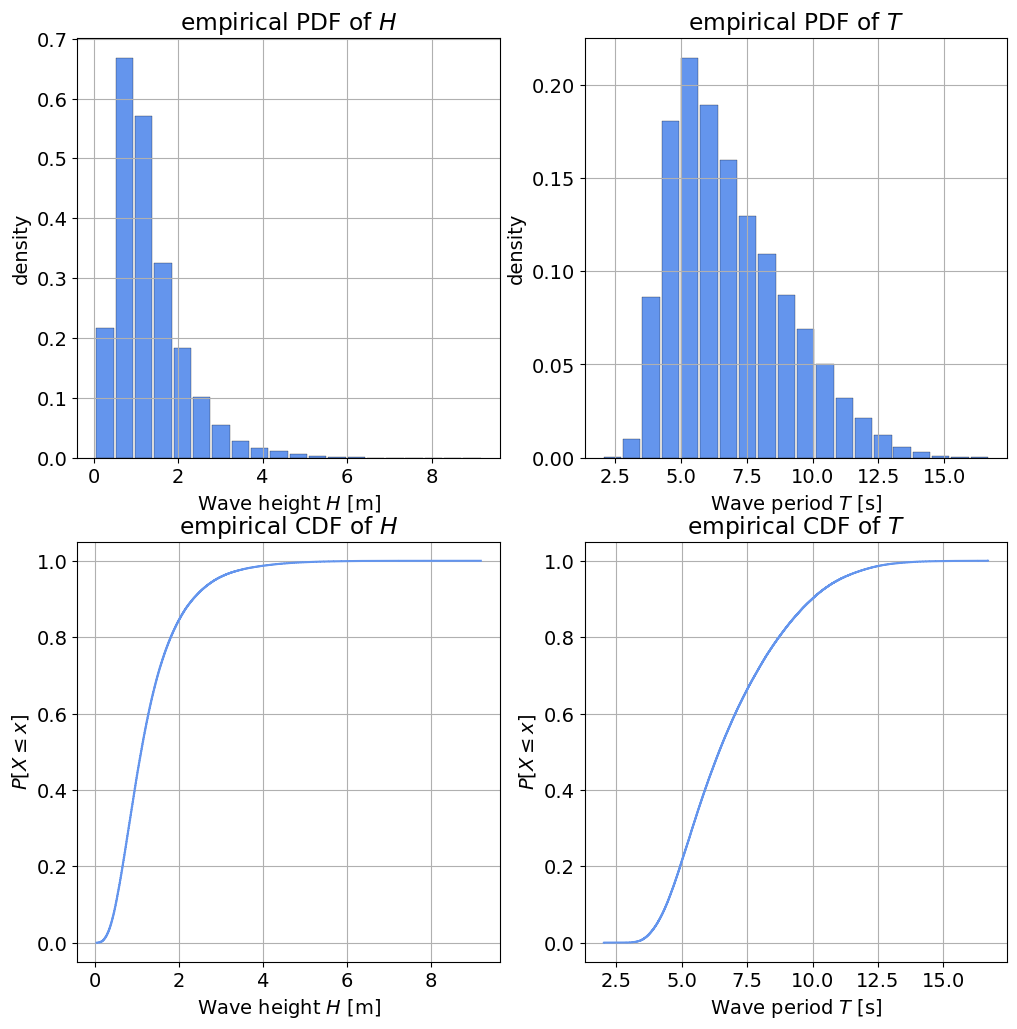

In [6]:
fig, axes = plt.subplots(2, 2, figsize=(12, 12))

# Plot the PDF of H
axes[0,0].hist(H, edgecolor='k', linewidth=0.2, rwidth = 0.9,
             color='cornflowerblue', density = True, bins = 20)
axes[0,0].set_xlabel('Wave height $H$ [m]')
axes[0,0].set_ylabel('density')
axes[0,0].set_title('empirical PDF of $H$')
axes[0,0].grid()

# Plot the PDF of T
axes[0,1].hist(T, edgecolor='k', linewidth=0.2, rwidth = 0.9,
             color='cornflowerblue', density = True, bins = 20)
axes[0,1].set_xlabel('Wave period $T$ [s]')
axes[0,1].set_ylabel('density')
axes[0,1].set_title('empirical PDF of $T$')
axes[0,1].grid()

# Plot the empirical CDF of H
axes[1,0].step(ecdf(H)[1], ecdf(H)[0], 
             color='cornflowerblue')
axes[1,0].set_xlabel('Wave height $H$ [m]')
axes[1,0].set_ylabel('${P[X \leq x]}$')
axes[1,0].set_title('empirical CDF of $H$')
axes[1,0].grid()

# Plot the empirical CDF of T
axes[1,1].step(ecdf(T)[1], ecdf(T)[0], 
             color='cornflowerblue', label='Wave period, T (s)')
axes[1,1].set_xlabel('Wave period $T$ [s]')
axes[1,1].set_ylabel('${P[X \leq x]}$')
axes[1,1].set_title('empirical CDF of $T$')
axes[1,1].grid()

<div style="background-color:#AABAB2; color: black; width:95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 3:</b>   

Based on the results of Task 1 and the empirical PDF and CDF, select <b>one</b> distribution to fit to each variable. 
    <li>For $H$, select between an Exponential or Gaussian distribution.</li>
    <li>For $T$ choose between a Uniform or Gumbel distribution.</li>

</p>
</div>

<div style="background-color:#FAE99E; color: black; width:95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<b>Solution:</b>

$H$: Exponential
$T$: Gumbel

</div>
</div>

## 3. Fitting a distribution

<div style="background-color:#AABAB2; color: black; width:95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 4:</b>  
 
Fit the selected distributions to the observations using MLE.
</p>
</div>

Hint: Use [Scipy](https://docs.scipy.org/doc/scipy/reference/stats.html)'s built-in functions (be careful with the parameter definitions!).

In [9]:
params_H = stats.expon.fit(H, floc=0)
params_T = stats.gumbel_r.fit(T)

## 4. Assessing goodness of fit

<div style="background-color:#AABAB2; color: black; width:95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 5:</b>  
 
Assess the goodness of fit of the selected distribution using:
    <li> One graphical method: QQplot or Logscale. Choose one.</li>
    <li> The Kolmogorov-Smirnov test.</li>
</p>
</div>

Hint: The Kolmogorov-Smirnov test is implemented in [Scipy](https://docs.scipy.org/doc/scipy/reference/stats.html).

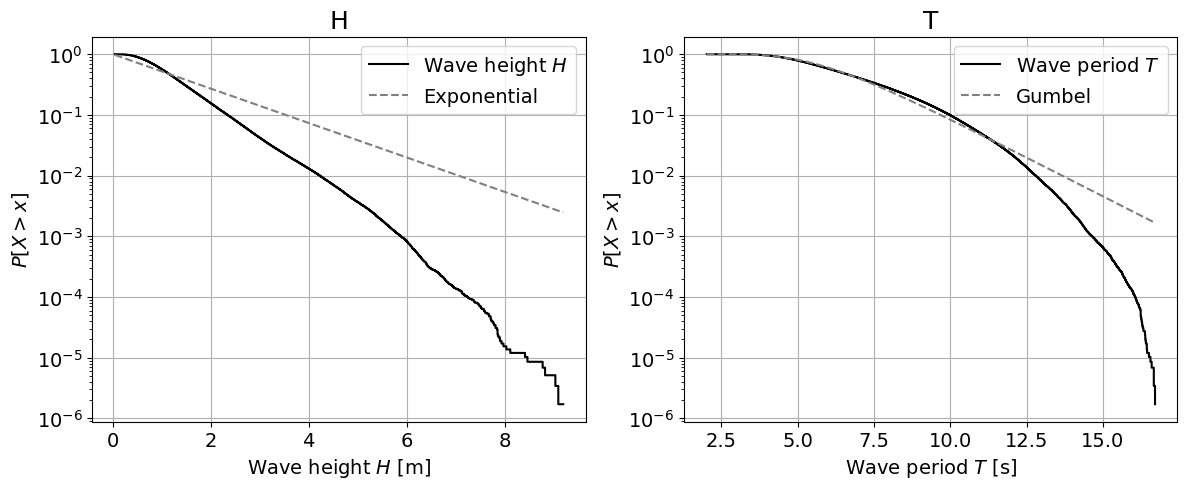

In [10]:
# Graphical method

# Logscale 
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].step(ecdf(H)[1], 1-ecdf(H)[0], 
             color='k', label='Wave height $H$')
axes[0].plot(ecdf(H)[1], 1-stats.expon.cdf(ecdf(H)[1], *params_H),
             '--', color = 'grey', label='Exponential')
axes[0].set_xlabel('Wave height $H$ [m]')
axes[0].set_ylabel('${P[X > x]}$')
axes[0].set_title('H', fontsize=18)
axes[0].set_yscale('log')
axes[0].legend(loc = "upper right")
axes[0].grid()

axes[1].step(ecdf(T)[1], 1-ecdf(T)[0], 
             color='k', label='Wave period $T$')
axes[1].plot(ecdf(T)[1], 1-stats.gumbel_r.cdf(ecdf(T)[1], *params_T),
             '--', color = 'grey', label='Gumbel')
axes[1].set_xlabel('Wave period $T$ [s]')
axes[1].set_ylabel('${P[X > x]}$')
axes[1].set_title('T', fontsize=18)
axes[1].set_yscale('log')
axes[1].legend(loc = "upper right")
axes[1].grid()

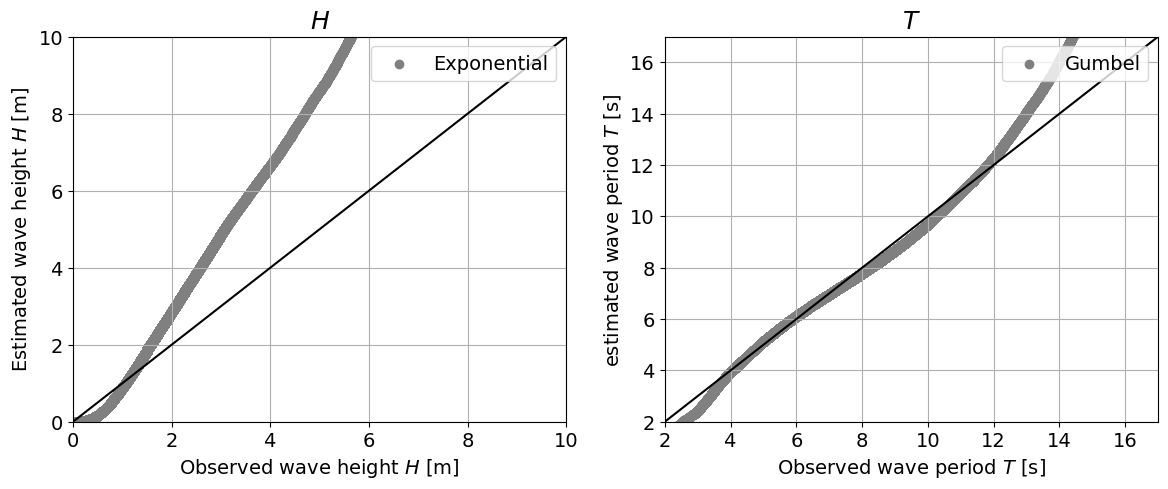

In [11]:
# QQ plot
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].plot([trunc(min(H)), ceil(max(H))], [trunc(min(H)), ceil(max(H))], 'k')
axes[0].scatter(ecdf(H)[1], stats.expon.ppf(ecdf(H)[0], *params_H), 
             color='grey', label='Exponential')
axes[0].set_xlabel('Observed wave height $H$ [m]')
axes[0].set_ylabel('Estimated wave height $H$ [m]')
axes[0].set_title('$H$', fontsize=18)
axes[0].set_xlim([trunc(min(H)), ceil(max(H))])
axes[0].set_ylim([trunc(min(H)), ceil(max(H))])
axes[0].legend(loc = "upper right")
axes[0].grid()

axes[1].plot([trunc(min(T)), ceil(max(T))], [trunc(min(T)), ceil(max(T))], 'k')
axes[1].scatter(ecdf(T)[1], stats.gumbel_r.ppf(ecdf(T)[0], *params_T), 
             color='grey', label='Gumbel')
axes[1].set_xlabel('Observed wave period $T$ [s]')
axes[1].set_ylabel('estimated wave period $T$ [s]')
axes[1].set_title('$T$', fontsize=18)
axes[1].set_xlim([trunc(min(T)), ceil(max(T))])
axes[1].set_ylim([trunc(min(T)), ceil(max(T))])
axes[1].legend(loc = "upper right")
axes[1].grid()

In [12]:
# KS test
_, p_H = stats.kstest(H,stats.expon.cdf, args=params_H)
_, p_T = stats.kstest(T,stats.gumbel_r.cdf, args=params_T)

print('The p-value for the fitted Gumbel distribution to H is:', round(p_H, 3))
print('The p-value for the fitted Uniform distribution to d is:', round(p_T, 3))

The p-value for the fitted Gumbel distribution to H is: 0.0
The p-value for the fitted Uniform distribution to d is: 0.0


<div style="background-color:#AABAB2; color: black; width:95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 6:</b>  
 
Interpret the results of the GOF techniques. How does the selected parametric distribution perform?
</p>
</div>

<div style="background-color:#FAE99E; color: black; width:95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
    <b>Solution:</b>

- <b>Logscale plot</b>: This technique allows to visually assess the fitting of the parametric distribution to the tail of the empirical distribution. For $H$, Exponential distribution performs well for low values. On the contrary, it does not properly model the right tail. It errs on the safe side, providing higher predictions of wave height than those observed. Note that this may lead to predictions of $H$ that are not physically likely. Regarding $T$, the Gumbel distribution seems to follow the low observations and those around the central moments but not those on the right tail. The predictions provided by the Gumbel distribution are on the safe side. 
- <b>QQplot</b>: Similar conclusions to those for Logscale can be derived.
- <b>Kolmogorov-Smirnov test</b>: remember that the test statistic measures the difference between two distributions. The p-value then represents the probability of observing a difference at least that large for a sample from the assumed distribution. If p-value is lower than the significance ($\alpha=0.05$, for instance), the null hypothesis is rejected. Considering here $\alpha=0.05$, we can reject the hypothesis that the variable $H$ comes from a Exponential distribution and that $T$ comes from a Gumbel distribution.
</div>
</div>

## 5. Propagating the uncertainty

Using the fitted distributions, we are going to propagate the uncertainty from $H$ and $T$ to $F_h$ with a Monte Carlo approach **assuming that $H$ and $T$ are independent**.

<div style="background-color:#AABAB2; color: black; width:95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 7:</b>   
    
1. Draw 10,000 random samples from the fitted distribution functions for $H$ and $T$.
    
2. Compute $F_h$ for each pair of the generated samples.
    
3. Compute $F_h$ for the observations.
    
4. Plot the PDF and exceedance curve in logscale of $F_h$ computed using both the simulations and the observations.
</p>
</div>

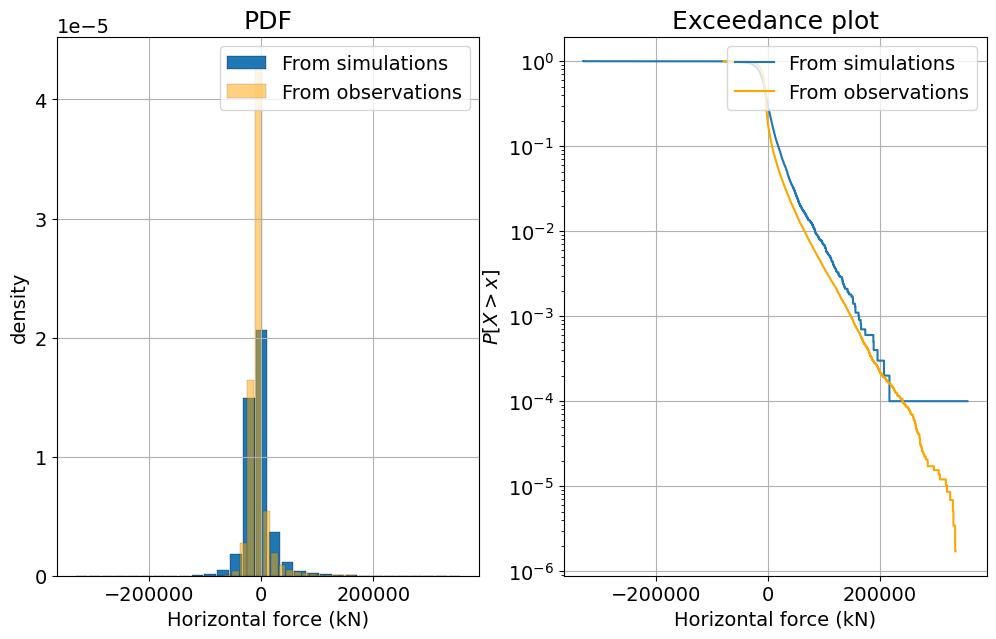

In [22]:
# Here, the solution is shown for the Lognormal distribution

# Draw random samples
rs_H = stats.expon.rvs(*params_H, size = 10000)
rs_T = stats.gumbel_r.rvs(*params_T, size = 10000)

# Compute Fh
rs_Fh = 255.4 * rs_H * rs_T**2 - 490.4*rs_T**2

# Repeat for observations
Fh = 255.4 * H * T**2 - 490.4*T**2

# Plot the PDF and the CDF
fig, axes = plt.subplots(1, 2, figsize=(12, 7))
axes[0].hist(rs_Fh, edgecolor='k', linewidth=0.2, density = True, label = 'From simulations', bins = 30, rwidth = 0.9)
axes[0].hist(Fh, edgecolor='k', facecolor = 'orange', alpha = 0.5, linewidth=0.2, rwidth = 0.9, density = True, label = 'From observations', bins = 30)
axes[0].set_xlabel('Horizontal force (kN)')
axes[0].set_ylabel('density')
axes[0].set_title('PDF', fontsize=18)
axes[0].legend(loc = "upper right")
axes[0].grid()

axes[1].step(ecdf(rs_Fh)[1], 1-ecdf(rs_Fh)[0], label = 'From simulations')
axes[1].step(ecdf(Fh)[1], 1-ecdf(Fh)[0], color = 'orange', label = 'From observations')
axes[1].set_xlabel('Horizontal force (kN)')
axes[1].set_ylabel('${P[X > x]}$')
axes[1].set_title('Exceedance plot', fontsize=18)
axes[1].set_yscale('log')
axes[1].legend(loc = "upper right")
axes[1].grid()

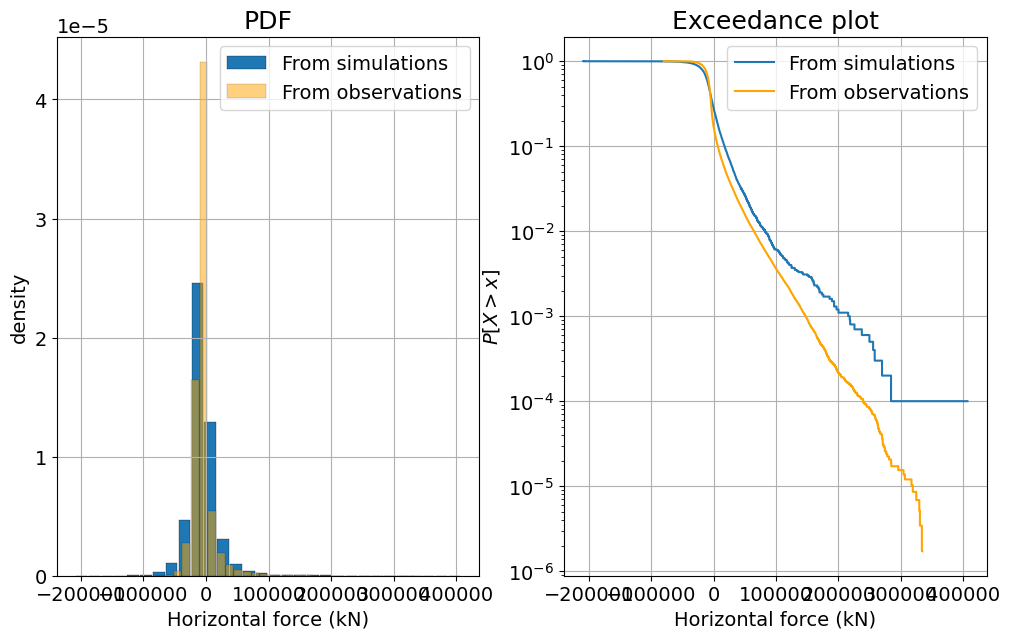

In [23]:
# Here, the solution is shown for the Lognormal distribution

# Draw random samples
rs_H = stats.expon.rvs(*params_H, size = 10000)
rs_T = stats.gumbel_r.rvs(*params_T, size = 10000)

# Compute Fh
rs_Fh = 255.4 * rs_H * rs_T**2 - 490.4*rs_T**2

# Repeat for observations
Fh = 255.4 * H * T**2 - 490.4*T**2

# Plot the PDF and the CDF
fig, axes = plt.subplots(1, 2, figsize=(12, 7))
axes[0].hist(rs_Fh, edgecolor='k', linewidth=0.2, density = True, label = 'From simulations', bins = 30, rwidth = 0.9)
axes[0].hist(Fh, edgecolor='k', facecolor = 'orange', alpha = 0.5, linewidth=0.2, bins = 30, rwidth = 0.9, density = True, label = 'From observations')
axes[0].set_xlabel('Horizontal force (kN)')
axes[0].set_ylabel('density')
axes[0].set_title('PDF', fontsize=18)
axes[0].legend(loc = "upper right")
axes[0].grid()

axes[1].step(ecdf(rs_Fh)[1], 1-ecdf(rs_Fh)[0], label = 'From simulations')
axes[1].step(ecdf(Fh)[1], 1-ecdf(Fh)[0], color = 'orange', label = 'From observations')
axes[1].set_xlabel('Horizontal force (kN)')
axes[1].set_ylabel('${P[X > x]}$')
axes[1].set_title('Exceedance plot', fontsize=18)
axes[1].set_yscale('log')
axes[1].legend(loc = "upper right")
axes[1].grid()

<div style="background-color:#AABAB2; color: black; width:95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 8:</b>   

Interpret the figures above, answering the following questions:
- Are there differences between the two computed distributions for $F_h$?
- What are the advantages and disadvantages of using the simulations?
</p>
</div>

<div style="background-color:#FAE99E; color: black; width:95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
    <b>Solution:</b>

- In the PDF plot, we can see that the shape of the distribution is similar for $F_h$. However, less density is concentrated around the central moments in the simualted data. In the CDF plot, we can see that there are significant differences in the tail of the distribution of $F_h$, being the values from the simulations higher than those computed from the observations. This is because both the Exponential and the Gumbel distribution overpredict the tail of the distributions of $H$ and $T$, respectively. 
- <b>Disadvantages:</b> we are assuming that $H$ and $T$ are independent (we will see how to address this issue next week). But is that true? Also, the results are conditioned to how good model is the selected parametric distribution. In this case, since the tail of the distributions of $H$ and $T$ are not properly fitted, the obtained distribution for $F_h$ deviates from the one obtained from the observations. <b>Advantages:</b> I can draw all the samples I want allowing the computation of events I have not observed yet (extreme events).
- <b>Extra note:</b> The equation you are applying to compute $F_h$ is prepared for extreme waves. Thus, when applied out its range of application, it leads to negative forces which do not have physical meaning.
</div>
</div>

If you run the code in the cell below, you will obtain a scatter plot of both variables. Explore the relationship between both variables and answer the following questions:

<div style="background-color:#AABAB2; color: black; width:95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 9:</b>   
    
1. Observe the plot below. What differences do you observe between the generated samples and the observations?
    
2. Compute the correlation between $H$ and $T$ for the samples and for the observartions. Are there differences?
    
3. What can you improve into the previous analysis? Do you have any ideas/suggestions on how to implement those suggestions?
</p>
</div>

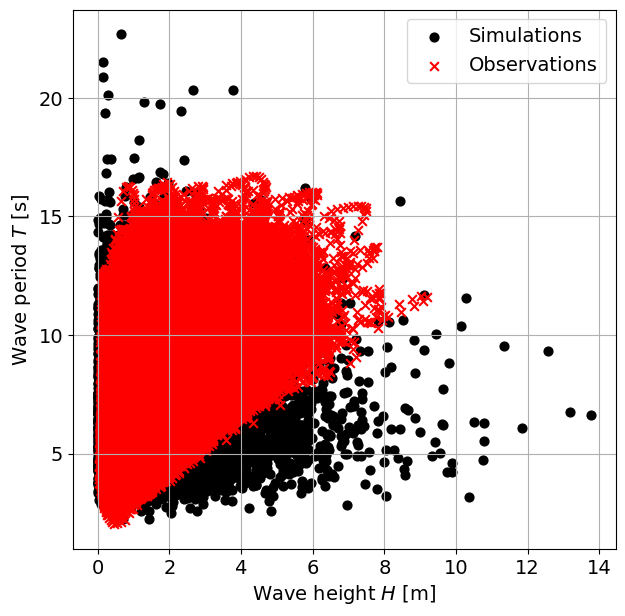

In [26]:
fig, axes = plt.subplots(1, 1, figsize=(7, 7))
axes.scatter(rs_H, rs_T, 40, 'k', label = 'Simulations')
axes.scatter(H, T, 40, 'r', marker = 'x', label = 'Observations')
axes.set_xlabel('Wave height $H$ [m]')
axes.set_ylabel('Wave period $T$ [s]')
axes.legend(loc = "upper right")
axes.grid()

In [27]:
#Correlation
correl = stats.pearsonr(H, T)
correl_rs = stats.pearsonr(rs_H, rs_T)
print('The correlation between the observations is:', correl[0])
print('The correlation between the simulations is:', correl_rs[0])

The correlation between the observations is: 0.4557991072619604
The correlation between the simulations is: 0.00032725319927376633


<div style="background-color:#FAE99E; color: black; width:95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
    <b>Solution:</b>

- The observations are focussed in a wedge-shaped area of the plot while the simulations are spreaded less regularly. This is because the observations are dependent because there is a physical relationship between the wave height and the wave period. By contrast, the simualtions were assumed to be independent. </li>
- There is a correlation of $0.46$ between the observed $H$ and $T$, indicating a (physical) dependence between the variables. On the contrary, as expected, no significant correlation is observed between the generated samples.
- <b>Some suggestions:</b> Improve the fit of $H$ and $T$. Maybe propose Gumbel or Lognormal distribution for $H$ and Lognormal for $T$. Account for the dependence between the two variables. </li>
</div>

## Part 1

<div style="background-color:#AABAB2; color: black; width:90%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>

$\text{Task x.x:}$
    
Run the cell below to load two dictionaries (objects) into the Python variable space, <code>m1</code> and <code>m2</code>. Some random math: $E = m \cdot c^2$. And

$$F = m \cdot a$$

You can run the code to check the key:value pairs.
    
</p>
</div>

In [ ]:
# Provided code which is not to be edited by students
import numpy as np

In [ ]:
# The code given to students can be indicated with:
# with a cell tag `assignment`.
# These cells will be removed from the solution notebook.
# The assignment notebook will be generated after a push to main and
# will be stored on the branch `assignment`.
# Places where student should write their code are marked with `### YOUR CODE HERE ###` for filling in a single line
# or with `### YOUR CODE LINES HERE` for filling in multiple lines

import numpy as np

a = [### YOUR CODE HERE ###]
    
### YOUR CODE LINES HERE

print('First 20 fibonacci numbers:', ### YOUR CODE HERE ###)

<div style="background-color:#FAE99E; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px; width: 90%">

$\text{Solution x.x:}$

Having trouble understanding how the Gauss-Newton scheme works? Do you want to visualize how the parameters and model change on each iteration? Try uncommenting the cell below to create an interactive plot!

It is set up to visualize the model on each iteration. You can gain insight into the way convergence occurs by changing the value of <code>initial_guess_alternative</code> and rerunning the cell.
</p></div>

Cells containing a solution block (with color ` #FAE99E`) will be removed in the assignment notebook.

In [ ]:
# Solution code (in a separate cell) is indicated with
# a cell tag 'solution'.
# These cells will be removed from the assignment notebook.
# The assignment notebook will be generated after a push to main and
# will be stored on the branch `solution`.

a = [0,2]

for i in range(2, 20):
    a.append(a[i-1] + a[i-2])

print('First 20 fibonacci numbers:', a)

<div style="background-color:#FAE99E; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px; width: 90%">
<p>
End of solution.
</p>
</div>

Cells containing a solution block (with color ` #FAE99E`) will be removed in the assignment notebook.

<div style="background-color:#facb8e; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px; width: 90%"> <p>

$\text{Tip:}$

Don't use the CSS danger/warning blocks because they don't display when converting to HTML with pandoc (won't display right on course files on website).
</p></div>

## Part `2, ...`

<div style="margin-top: 50px; padding-top: 20px; border-top: 1px solid #ccc;">
  <div style="display: flex; justify-content: flex-end; gap: 20px; align-items: center;">
    <a rel="MUDE" href="http://mude.citg.tudelft.nl/">
      <img alt="MUDE" style="width:100px; height:auto;" src="https://gitlab.tudelft.nl/mude/public/-/raw/main/mude-logo/MUDE_Logo-small.png" />
    </a>
    <a rel="TU Delft" href="https://www.tudelft.nl/en/ceg">
      <img alt="TU Delft" style="width:100px; height:auto;" src="https://gitlab.tudelft.nl/mude/public/-/raw/main/tu-logo/TU_P1_full-color.png" />
    </a>
    <a rel="license" href="http://creativecommons.org/licenses/by/4.0/">
      <img alt="Creative Commons License" style="width:88px; height:auto;" src="https://i.creativecommons.org/l/by/4.0/88x31.png" />
    </a>
  </div>
  <div style="font-size: 75%; margin-top: 10px; text-align: right;">
    &copy; Copyright 2025 <a rel="MUDE" href="http://mude.citg.tudelft.nl/">MUDE</a> TU Delft. 
    This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by/4.0/">CC BY 4.0 License</a>.
  </div>
</div>